In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr
import cv2
from time import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
X_train = np.load('Dataset/data_train.npy').T
t_train = np.load('Dataset/labels_train_corrected.npy')
X_test = np.load('Dataset/data_test.npy').T
t_test = np.load('Dataset/labels_test_corrected.npy')

X_train.shape, t_train.shape, X_test.shape, t_test.shape

((6720, 90000), (6720,), (2880, 90000), (2880,))

In [3]:
# Reshape the training adn test data set
X_train_reshaped = np.zeros((6720, 2500))
X_test_reshaped = np.zeros((2880, 2500))

for i in range(len(X_train[:, 0])):
    im1 = X_train[i, :].reshape(300,300)
    res = cv2.resize(im1, dsize=(50, 50), interpolation=cv2.INTER_CUBIC)
    X_train_reshaped[i, :] = res.reshape(2500,)
    
for i in range(len(X_test[:, 0])):
    im1 = X_test[i, :].reshape(300,300)
    res = cv2.resize(im1, dsize=(50, 50), interpolation=cv2.INTER_CUBIC)
    X_test_reshaped[i, :] = res.reshape(2500,)

X_train_reshaped.shape, X_test_reshaped.shape

((6720, 2500), (2880, 2500))

In [4]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats
from sklearn.model_selection import cross_val_score


# Define a function for evaluating performance
def Evaluate_performance(estimator, Name, confidence=True, X_train=X_train_reshaped, t_train=t_train, X_test=X_test_reshaped, t_test=t_test, scoring='accuracy'):
    
    t0 = time()
    y_train = estimator.predict(X_train)
    t1 = time()
    predict_train_time = t1 - t0
    
    t0 = time()
    y_test = estimator.predict(X_test)
    t1 = time()
    predict_test_time = t1 - t0
    
    # Accuracy
    train_accuracy = accuracy_score(t_train, y_train)
    test_accuracy = accuracy_score(t_test, y_test)
    
    if confidence == True:
        # 95% CI in training set
        scores = cross_val_score(estimator, X_train, t_train,
                                scoring=scoring,
                                cv=5)
        confidence_ = 0.95
        train_interval = stats.t.interval(confidence_,
                                         len(scores)-1,
                                         loc = scores.mean(),
                                         scale=scores.std(ddof=1)/np.sqrt(len(scores)))

        # Accuracy and 95% CI in test set
        scores = cross_val_score(estimator, X_test, t_test,
                                scoring=scoring,
                                cv=5)
        confidence_ = 0.95
        test_interval = stats.t.interval(confidence_,
                                         len(scores)-1,
                                         loc = scores.mean(),
                                         scale=scores.std(ddof=1)/np.sqrt(len(scores)))
    
    print('Performance of {}:\n'.format(Name))
    print('1. In training set: (time used in predict: {:.2f} sec)'.format(predict_train_time))
    print(classification_report(t_train, y_train))
    print('Accuracy: {}'.format(train_accuracy))
    if confidence == True:
        print('95% CI: {}\n'.format(train_interval))
    print('Confusion Matrix')
    print(confusion_matrix(t_train, y_train))
    
    print('\n ===================================================== \n')
    
    print('2. In test set: (time used in predict: {:.2f} sec)'.format(predict_test_time))
    print(classification_report(t_test, y_test))
    print('Accuracy: {}'.format(test_accuracy))
    if confidence == True:
        print('95% CI: {}\n'.format(test_interval))
    print('Confusion Matrix')
    print(confusion_matrix(t_test, y_test))

* Identify which pixels are selected and displaymask examples from the training dataset.

In [5]:
# Load the model
import joblib  

rfe_lr = joblib.load('Model/rfe_lr_question1.pkl')
rfe_svm = joblib.load('Model/rfe_svm_question1.pkl')

Text(0.5, 1.0, 'Selected Pixels')

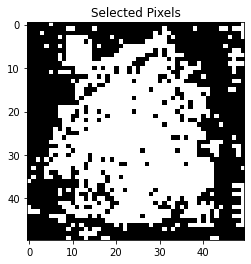

In [6]:
# For Logistic Regression with RFE
pixels = rfe_lr.named_steps['RFE'].support_.reshape(50,50)
plt.imshow(pixels, cmap='gray')
plt.title('Selected Pixels')

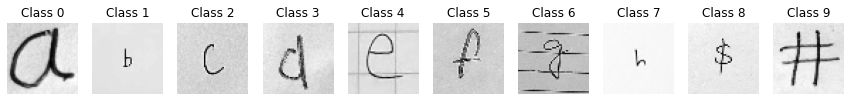

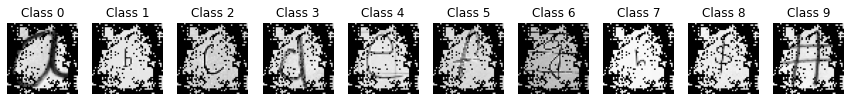

In [7]:
plt.figure(figsize=(15,15))
for i in range(10):
    index = np.where(t_train==i)
    plt.subplot(1,10,i+1)
    plt.imshow(X_train_reshaped[index[0][0], :].reshape(50,50), cmap='gray')
    plt.axis('off')
    plt.title('Class {:.0f}'.format(t_train[index[0][0]]))

plt.figure(figsize=(15,15))
for i in range(10):
    index = np.where(t_train==i)
    plt.subplot(1,10,i+1)
    plt.imshow(X_train_reshaped[index[0][0], :].reshape(50,50)*pixels, cmap='gray')
    plt.axis('off')
    plt.title('Class {:.0f}'.format(t_train[index[0][0]]))

Text(0.5, 1.0, 'Selected Pixels')

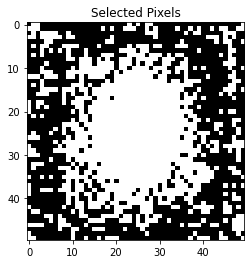

In [8]:
# For SVM with RFE
pixels = rfe_svm.named_steps['RFE'].support_.reshape(50,50)
plt.imshow(pixels, cmap='gray')
plt.title('Selected Pixels')

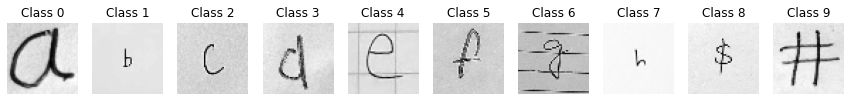

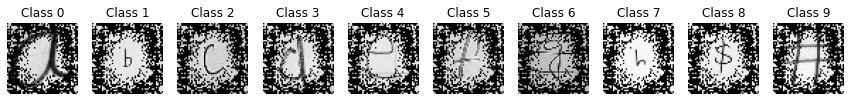

In [9]:
plt.figure(figsize=(15,15))
for i in range(10):
    index = np.where(t_train==i)
    plt.subplot(1,10,i+1)
    plt.imshow(X_train_reshaped[index[0][0], :].reshape(50,50), cmap='gray')
    plt.axis('off')
    plt.title('Class {:.0f}'.format(t_train[index[0][0]]))

plt.figure(figsize=(15,15))
for i in range(10):
    index = np.where(t_train==i)
    plt.subplot(1,10,i+1)
    plt.imshow(X_train_reshaped[index[0][0], :].reshape(50,50)*pixels, cmap='gray')
    plt.axis('off')
    plt.title('Class {:.0f}'.format(t_train[index[0][0]]))

## Question 2

* Was training faster using the reduced dataset?

When training the dataset with the 182 dimension's dataset, it took 8.76 seconds. When training the dataset with whole 2500 reshaped pixels, it took 76.26 seconds. Classifier with PCA is almost 10 times faster than the original classifier.

* Compare performances.

In [10]:
# Load the model
svm_pca = joblib.load('Model/svm_pca_question2.pkl')
svm = joblib.load('Model/svm_question2.pkl')

In [11]:
Evaluate_performance(estimator=svm_pca, confidence=True, Name='SVM with PCA')

Performance of SVM with PCA:

1. In training set: (time used in predict: 8.36 sec)
              precision    recall  f1-score   support

         0.0       0.60      0.64      0.62       686
         1.0       0.61      0.57      0.59       680
         2.0       0.44      0.78      0.57       680
         3.0       0.66      0.60      0.63       658
         4.0       0.69      0.56      0.62       656
         5.0       0.56      0.59      0.58       664
         6.0       0.68      0.65      0.66       671
         7.0       0.57      0.54      0.56       680
         8.0       0.72      0.55      0.63       672
         9.0       0.74      0.59      0.66       673

    accuracy                           0.61      6720
   macro avg       0.63      0.61      0.61      6720
weighted avg       0.63      0.61      0.61      6720

Accuracy: 0.6066964285714286
95% CI: (0.44942447657130097, 0.4776588567620324)

Confusion Matrix
[[436  26  62  32  24  25  22  35   4  20]
 [ 31 385 104  14 

In [12]:
Evaluate_performance(estimator=svm, confidence=True, Name='SVM without PCA')

Performance of SVM without PCA:

1. In training set: (time used in predict: 86.77 sec)
              precision    recall  f1-score   support

         0.0       0.67      0.68      0.68       686
         1.0       0.67      0.63      0.65       680
         2.0       0.46      0.82      0.59       680
         3.0       0.71      0.64      0.67       658
         4.0       0.74      0.61      0.67       656
         5.0       0.62      0.64      0.63       664
         6.0       0.73      0.70      0.71       671
         7.0       0.63      0.60      0.62       680
         8.0       0.78      0.61      0.68       672
         9.0       0.78      0.63      0.70       673

    accuracy                           0.66      6720
   macro avg       0.68      0.66      0.66      6720
weighted avg       0.68      0.66      0.66      6720

Accuracy: 0.65625
95% CI: (0.43644462129632317, 0.4599839501322484)

Confusion Matrix
[[468  20  58  28  23  22  17  30   3  17]
 [ 20 427  92  13   8  31

From the performance, we can see svm classifier without PCA has better accuracy in training data set, but in test data set, the accuracies are almost the same. 

* Visualize the top 10 eigenvectors. Discuss what they represent.

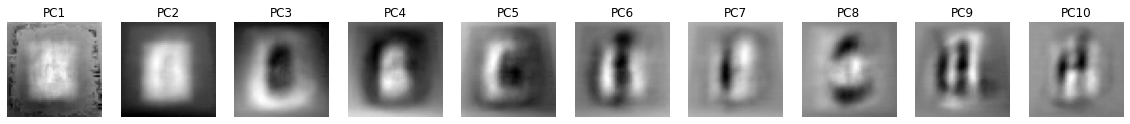

In [13]:
plt.figure(figsize=(20,5))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(svm_pca.named_steps['PCA'].components_[i,:].reshape(50,50), cmap='gray')
    plt.title('PC'+str(i+1)); plt.axis('off');

They represent the 10 maximum variance direction in the data. They are also the outline handwritten characters.

* Visualize examples of image reconstruction from PCA projections.

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Recall that the number of components we choose is 182
pca_pipe = Pipeline([('scaler', MinMaxScaler()), 
                 ('PCA', PCA(n_components=182))])

pca_pipe.fit(X_train_reshaped)

Pipeline(steps=[('scaler', MinMaxScaler()), ('PCA', PCA(n_components=182))])

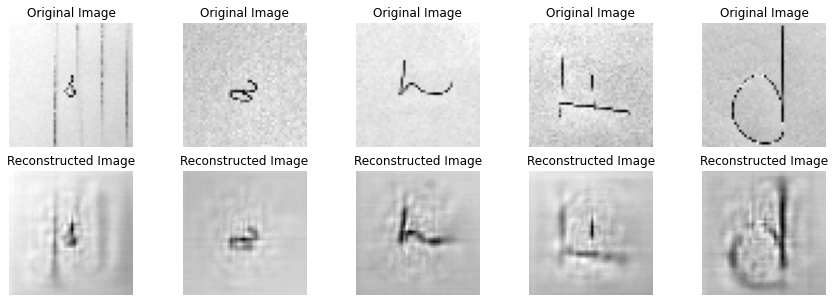

In [15]:
ypca_test = pca_pipe.transform(X_test_reshaped)
X_test_reconstructed =  pca_pipe.inverse_transform(ypca_test)

# Visualization
N = 5
idx = np.random.choice(range(X_test_reconstructed.shape[0]), size=N, replace=False)

fig = plt.figure(figsize=(15, 5))

j=1
for i in range(N):
    fig.add_subplot(2,N,j)
    plt.imshow(X_test_reshaped[idx[i], :].reshape(50,50), cmap='gray')
    plt.axis('off')
    plt.title('Original Image')
    
    fig.add_subplot(2,N,j+N)
    plt.imshow(X_test_reconstructed[idx[i], :].reshape(50,50), cmap='gray')
    plt.axis('off')
    plt.title('Reconstructed Image')
    
    j += 1

## Question 3

* Visualize the dataset, be sure to color-code each point to its corresponding target label.

In [16]:
# Load the dataset
X_lda = np.load('Dataset/data_train_lda_question3.npy')
X_tsne = np.load('Dataset/data_train_tsne_question3.npy')
lda = joblib.load('Model/lda_question3.pkl')
tsne = joblib.load('Model/tsne_question3.pkl')

X_lda.shape, X_tsne.shape

((6720, 2), (6720, 2))

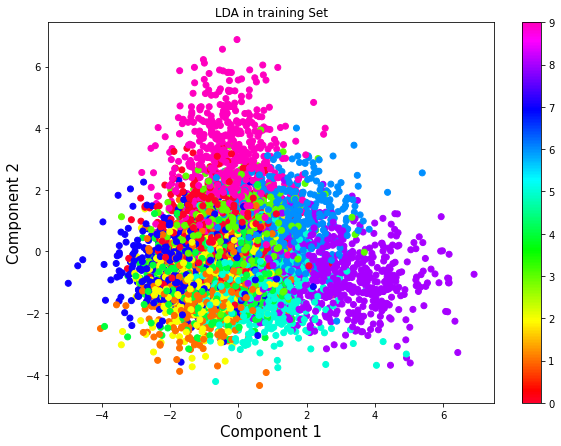

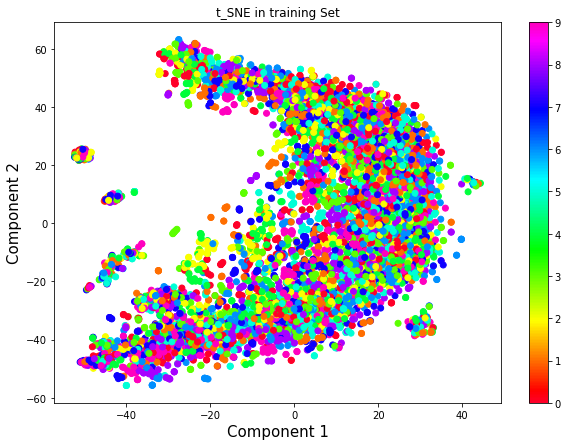

In [17]:
#Visualization in training set
## Visualization for LDA
plt.figure(figsize=(10,7))
plt.scatter(X_lda[:,0], X_lda[:,1], c=t_train, cmap=plt.cm.gist_rainbow)
plt.xlabel('Component 1', size=15)
plt.ylabel('Component 2', size=15)
plt.title('LDA in training Set')
plt.colorbar()

## Visualization for t_SNE
plt.figure(figsize=(10,7))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=t_train, cmap=plt.cm.gist_rainbow)
plt.xlabel('Component 1', size=15)
plt.ylabel('Component 2', size=15)
plt.title('t_SNE in training Set')
plt.colorbar();

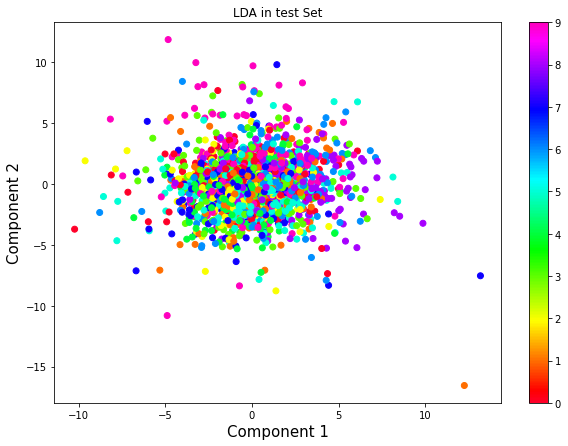

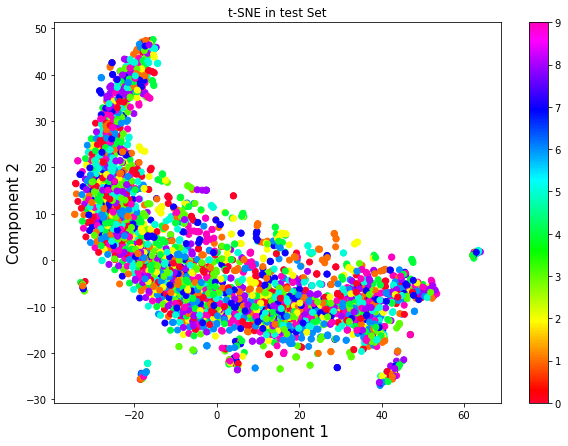

In [18]:
# Visualization in test set
ylda = lda.transform(X_test_reshaped)
ytsne = tsne.fit_transform(X_test_reshaped)

## Visualization for LDA
plt.figure(figsize=(10,7))
plt.scatter(ylda[:,0], ylda[:,1], c=t_test, cmap=plt.cm.gist_rainbow)
plt.xlabel('Component 1', size=15)
plt.ylabel('Component 2', size=15)
plt.title('LDA in test Set')
plt.colorbar()

## Visualization for LDA
plt.figure(figsize=(10,7))
plt.scatter(ytsne[:,0], ytsne[:,1], c=t_test, cmap=plt.cm.gist_rainbow)
plt.xlabel('Component 1', size=15)
plt.ylabel('Component 2', size=15)
plt.title('t-SNE in test Set')
plt.colorbar()

* How many features would you select? Why?
    

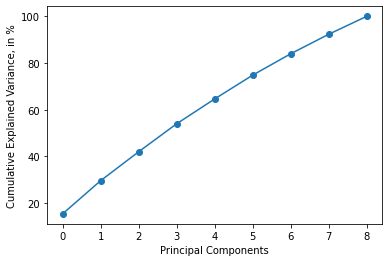

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE 

lda = Pipeline([('scaler', MinMaxScaler()),
               ('features_selector', LDA(n_components=9))])

lda.fit(X_train_reshaped, t_train)

plt.plot(100*np.cumsum(lda.named_steps['features_selector'].explained_variance_ratio_), '-o')
plt.xlabel('Principal Components',size=10)
plt.ylabel('Cumulative Explained Variance, in %', size=10);

In [20]:
lda_num_to_choose = np.where(np.cumsum(lda.named_steps['features_selector'].explained_variance_ratio_)>0.9)[0][0] + 1
print('For LDA, I select {} features.'.format(lda_num_to_choose))
print('This is because when 8 features are selected, the explained varianced is above 90%')

For LDA, I select 8 features.
This is because when 8 features are selected, the explained varianced is above 90%


For t_SNE, which is used for visualization, its numbers of components can only be setted in 2 and 3.

* Visualize and compare the 2-dimensional projections with PCA. Discuss your observations.

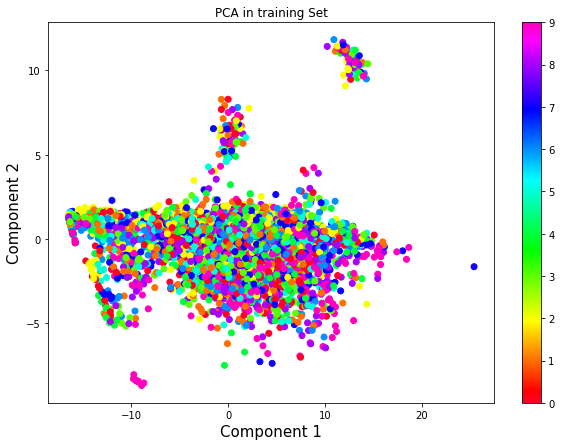

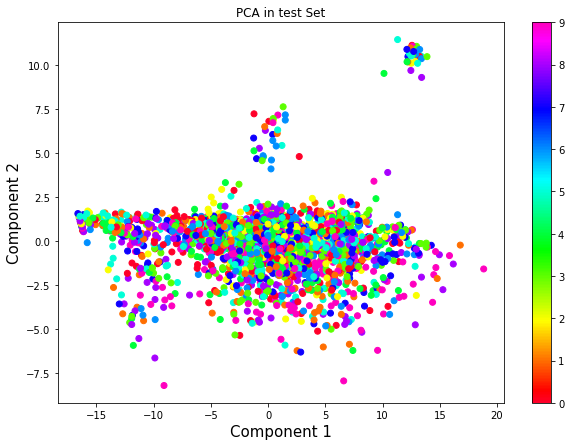

In [21]:
X_pca = np.load('Dataset/data_train_pca_question3.npy')
pca = joblib.load('Model/pca_question3.pkl')

# For training
plt.figure(figsize=(10,7))
plt.scatter(X_pca[:,0], X_pca[:,1], c=t_train, cmap=plt.cm.gist_rainbow)
plt.xlabel('Component 1', size=15)
plt.ylabel('Component 2', size=15)
plt.title('PCA in training Set')
plt.colorbar()

# For test
ypca = pca.transform(X_test_reshaped)

plt.figure(figsize=(10,7))
plt.scatter(ypca[:,0], ypca[:,1], c=t_test, cmap=plt.cm.gist_rainbow)
plt.xlabel('Component 1', size=15)
plt.ylabel('Component 2', size=15)
plt.title('PCA in test Set')
plt.colorbar()

From the three figures above, we can see the LDA has the best performance. It has distinct clusters for some classes. Compared to LDA, PCA and t_SNE cannot clearly classify the classes.

## Question 4

 * Which manifold learning algorithm would you select?
    
   

In [22]:
# Load the model
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.manifold import MDS, Isomap
from sklearn.manifold import LocallyLinearEmbedding as LLE
import warnings
import joblib
warnings.filterwarnings("ignore")

class Custom_MDS(BaseEstimator, TransformerMixin):
    
    def __init__(self, n_components=2):
        self.n_components = n_components
        self.mds = MDS(n_components=self.n_components)
    
    def fit(self, X, y=None):
        self.mds.fit_transform(X, y)
        return self
    
    def transform(self, X, y=None):
        self.embedding_ = self.mds.fit_transform(X,y)
        return self.embedding_
    
    def fit_transform(self, X, y=None):
        self.mds.fit_transform(X, y)
        self.embedding_ = self.mds.fit_transform(X,y)
        return self.embedding_

svm_mds = joblib.load('Model/svm_mds_question4.pkl')
svm_isomap = joblib.load('Model/svm_isomap_question4.pkl')
svm_lle = joblib.load('Model/svm_lle_question4.pkl')

In [23]:
# Performance of MSD
Evaluate_performance(estimator=svm_mds, Name='SVM classifier with MDS', confidence=False)

Performance of SVM classifier with MDS:

1. In training set: (time used in predict: 1467.02 sec)
              precision    recall  f1-score   support

         0.0       0.08      0.07      0.08       686
         1.0       0.12      0.11      0.11       680
         2.0       0.12      0.10      0.11       680
         3.0       0.09      0.17      0.12       658
         4.0       0.12      0.08      0.09       656
         5.0       0.08      0.06      0.07       664
         6.0       0.10      0.06      0.07       671
         7.0       0.10      0.06      0.07       680
         8.0       0.10      0.19      0.13       672
         9.0       0.14      0.13      0.14       673

    accuracy                           0.10      6720
   macro avg       0.10      0.10      0.10      6720
weighted avg       0.10      0.10      0.10      6720

Accuracy: 0.10357142857142858
Confusion Matrix
[[ 50  68  61 154  44  55  36  47 107  64]
 [ 63  73  61 133  33  52  33  29 132  71]
 [ 61  59  

In [24]:
# Performance of Isomap
Evaluate_performance(estimator=svm_isomap, Name='SVM classifier with Isomap', confidence=False)

Performance of SVM classifier with Isomap:

1. In training set: (time used in predict: 13.79 sec)
              precision    recall  f1-score   support

         0.0       0.31      0.44      0.37       686
         1.0       0.36      0.37      0.36       680
         2.0       0.33      0.56      0.41       680
         3.0       0.41      0.28      0.33       658
         4.0       0.45      0.29      0.35       656
         5.0       0.32      0.36      0.34       664
         6.0       0.32      0.28      0.30       671
         7.0       0.45      0.33      0.38       680
         8.0       0.46      0.40      0.43       672
         9.0       0.45      0.39      0.42       673

    accuracy                           0.37      6720
   macro avg       0.39      0.37      0.37      6720
weighted avg       0.39      0.37      0.37      6720

Accuracy: 0.371875
Confusion Matrix
[[303  36  82  36  28  49  52  27  32  41]
 [ 73 253 100  16  25  52  30  55  28  48]
 [ 69  39 378  19  54

In [25]:
# Performance of LLE
Evaluate_performance(estimator=svm_lle, Name='SVM classifier with LLE', confidence=False)

Performance of SVM classifier with LLE:

1. In training set: (time used in predict: 13.07 sec)
              precision    recall  f1-score   support

         0.0       0.24      0.35      0.28       686
         1.0       0.28      0.34      0.31       680
         2.0       0.38      0.32      0.35       680
         3.0       0.22      0.26      0.24       658
         4.0       0.36      0.21      0.27       656
         5.0       0.25      0.29      0.27       664
         6.0       0.30      0.24      0.27       671
         7.0       0.36      0.19      0.25       680
         8.0       0.31      0.38      0.34       672
         9.0       0.30      0.30      0.30       673

    accuracy                           0.29      6720
   macro avg       0.30      0.29      0.29      6720
weighted avg       0.30      0.29      0.29      6720

Accuracy: 0.2876488095238095
Confusion Matrix
[[239  67  53  70  38  40  35  19  59  66]
 [ 86 232  42  56  17  54  30  45  66  52]
 [ 80  62 218 

From the evaluation above, I will select ISOMAP as my dimensinality reduction algorithm. This is because ISOMAP has the highest accuracy score in both training set and test set, and it takes lower time on training.

 * Visualize and interprEvaluate_performancest 2 dimensions in the manifold learning algorithm you train.

Text(0.5, 1.0, 'LLE')

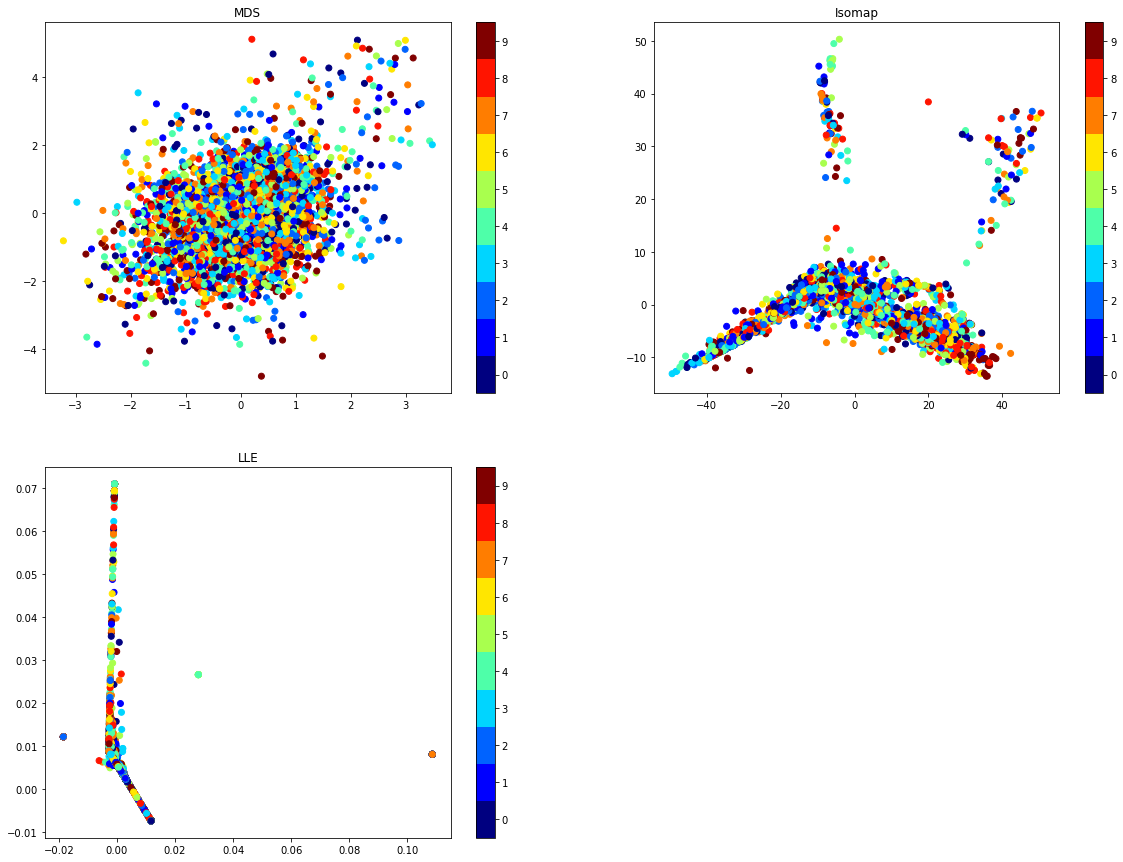

In [27]:
plt.figure(figsize=(20,15))

# Load the model
svm_mds = joblib.load('Model/svm_mds_question4.pkl')
svm_isomap = joblib.load('Model/svm_isomap_question4.pkl')
svm_lle = joblib.load('Model/svm_lle_question4.pkl')

# MDS
proj = svm_mds.named_steps['features_selector'].embedding_
plt.subplot(2,2,1)
plt.scatter(proj[:, 0], proj[:, 1], c=t_train, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);
plt.title('MDS')

# Isomap
proj = svm_isomap.named_steps['features_selector'].embedding_
plt.subplot(2,2,2)
plt.scatter(proj[:, 0], proj[:, 1], c=t_train, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.title('Isomap')

# LLE
proj = svm_lle.named_steps['features_selector'].embedding_
plt.subplot(2,2,3)
plt.scatter(proj[:, 0], proj[:, 1], c=t_train, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.title('LLE')

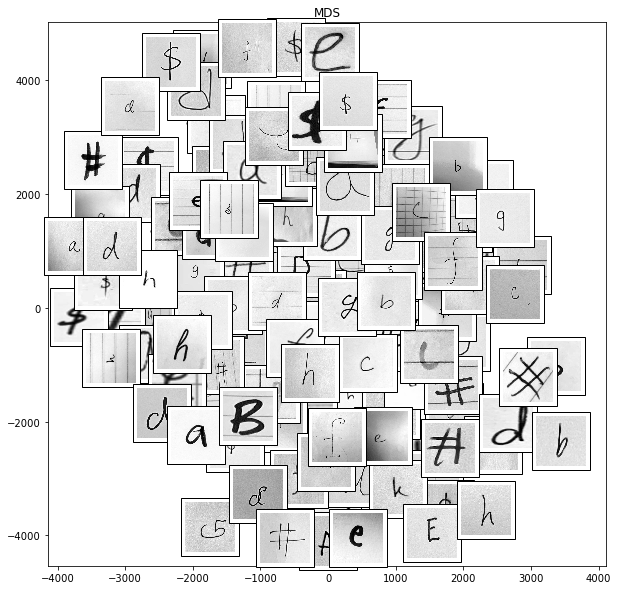

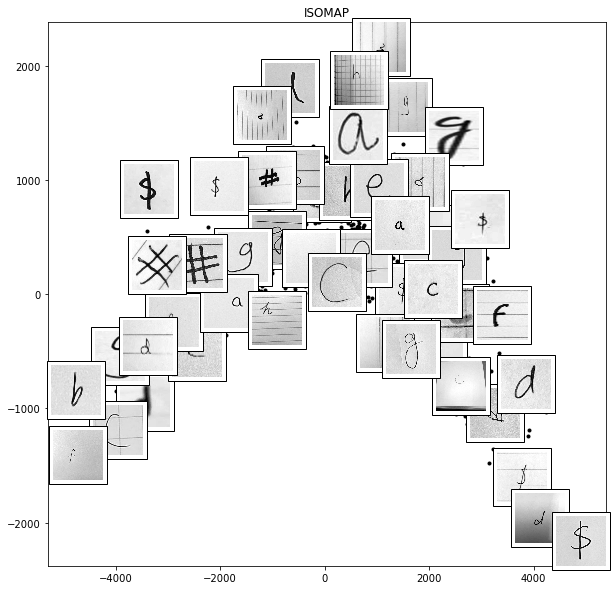

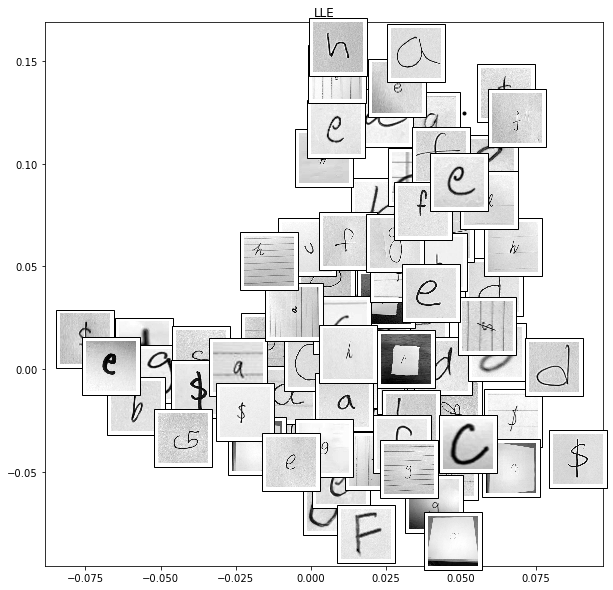

In [28]:
from matplotlib import offsetbox
def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

#%% 
data = X_train_reshaped[::6]

# MDS
fig, ax = plt.subplots(figsize=(10, 10))
model = MDS(n_components=2)
plot_components(data, model, images=X_train_reshaped.reshape((-1, 50, 50)),
                ax=ax, thumb_frac=0.05, cmap='gray')
plt.title('MDS')

# ISOMAP
fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_components=2, n_neighbors=100)
plot_components(data, model, images=X_train_reshaped.reshape((-1, 50, 50)),
                ax=ax, thumb_frac=0.05, cmap='gray')
plt.title('ISOMAP')

# LLE
fig, ax = plt.subplots(figsize=(10, 10))
model = LLE(n_components=2, n_neighbors=100)
plot_components(data, model, images=X_train_reshaped.reshape((-1, 50, 50)),
                ax=ax, thumb_frac=0.05, cmap='gray')
plt.title('LLE');